In [1]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-yy8yc1ja
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-yy8yc1ja
  Resolved https://github.com/huggingface/transformers to commit 616bb11d487aabc231bb230b245c42214ea4b254
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 11.9 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9105423 sha256=69077c87894275a292b4a28dd4f31b51e19ba9a96959f1bd5f603a2d213dac97
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6123axl/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:

In [2]:
!pip install jupyterlab ipywidgets bertviz xformers evaluate matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cach

In [3]:
from transformers import BertModel,BertTokenizer
modelName='bert-base-uncased'
tokenizer=BertTokenizer.from_pretrained(modelName)
model=BertModel.from_pretrained(modelName)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
tokenized=tokenizer('I read a good novel.')
print(tokenized)

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
tokens=tokenizer.convert_ids_to_tokens(tokenized['input_ids'])
print(tokens)

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '.', '[SEP]']


In [9]:
##positional encoding
import numpy as np
import matplotlib.pyplot as plt
def encodePositions(num_tokens,depth,n=10000):
  positionalMatrix=np.zeros((num_tokens,depth))
  for row in range(num_tokens):
    for col in np.arange(int(depth/2)):
      denominator=np.power(n,2*col/depth)
      positionalMatrix[row, 2*col]=np.sin(row/denominator)
      positionalMatrix[row, 2*col+1]=np.cos(row/denominator)
  return positionalMatrix

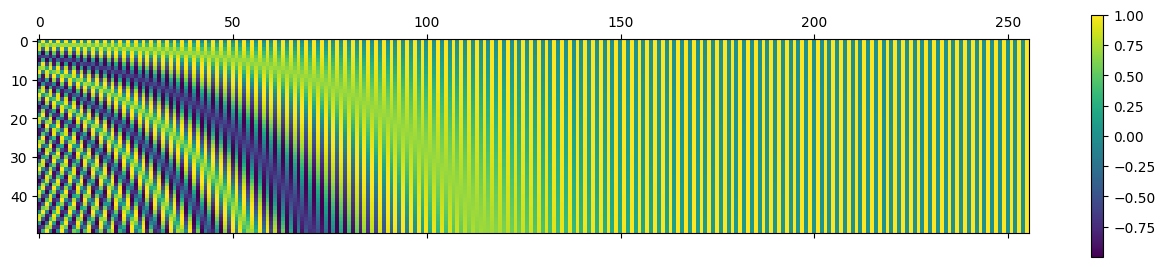

In [10]:
positionalMatrix = encodePositions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

In [12]:
from bertviz.transformers_neuron_view import BertModel,BertTokenizer
from bertviz.neuron_view import show
tokenizer_viz=BertTokenizer.from_pretrained(modelName)
model_viz=BertModel.from_pretrained(modelName)
show(model_viz,'bert',tokenizer_viz,'I read a good novel.',display_mode='light',head=11)

100%|██████████| 440473133/440473133 [00:32<00:00, 13578982.99B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
##GPT 2 Model with 137 parameters
from transformers import pipeline
generator=pipeline('text-generation',model='gpt2')
generator('I read a good novel.',max_length=30,num_return_sequences=5)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I read a good novel. It's a horror story about a group of kids who live in the past and find a way of communicating with their past"},
 {'generated_text': "I read a good novel. The only good thing about me today was I didn't have anyone else to worry about.\n\nB.S.:"},
 {'generated_text': 'I read a good novel. The main character was on the same side of the bar as the rest of the audience. We decided to go off to'},
 {'generated_text': 'I read a good novel. There are going to be more novels. But how many like that are there? I mean, is it the ones that'},
 {'generated_text': 'I read a good novel. It was about a boy and his family that came to India. They came in a boat and when they saw their father'}]

In [15]:
generator('This movie seemed really long',max_length=300,num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "This movie seemed really long on the battery battery and made the battery useless. I decided to add a little additional screen, which I found was so nice that I decided to add it for this movie. This was a much taller, more comfortable screen for the DVD player and the other two games I was playing, while also providing much more information.\n\n\nIn conclusion, this is a good movie, and the size it provides provides a nice movie even in the very narrow frame. It really reminds me of a short film of high school and high school kids on their phones, they're always reading newspapers. The movie really provides information about a kid who also happens to be a writer.\n\n…"},
 {'generated_text': "This movie seemed really long, I did not have anything to work with. The original movie felt very, very long—it took a few years before we realized how far away we were from what anyone else was going. And I was a different person in that process, but it wasn't to be.\n\n[WIRE

In [16]:
generator('Star Trek',max_length=100,num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Star Trek: The Motion Picture - 25,000 Units)\n\nThe first full-length feature film starring Christopher Walken.\n\nAlso considered as a classic, this is a remake of the classic classic 1960s sci-fi movie.\n\n\nVideo Game Description\n\nThe movie is the first in a series of sci-fi shorts with the "Star Trek" title and setting with a brand new Trek universe.\n\n\nEntertainment\n\nThe opening sequence featured a space shuttle, a'},
 {'generated_text': 'Star Trek\' episode "The Star Trek Deep Space Nine" in November of 2006, the episode had its first "scandalous" twist in it\'s development since then, and as well its seventh year in development, it has yet to find wide-eyed success.\n\nThe pilot episode "Star Trek: Trouble Undiscovered" was the first pilot to reach its big screen debut, which has not been included in the latest canon list of Star Trek: The Next Generation films. Originally titled "'},
 {'generated_text': "Star Trek 2: TNG season 2 - and the one in whi

In [17]:
##gpt2 model with large number of parameters=812
generator=pipeline('text-generation',model='gpt2-large')
generator('I read a good novel.',max_length=30,num_return_sequences=5)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. And, yes, I read it on my iPad, with no internet.\n\nI read to my two toddlers,'},
 {'generated_text': 'I read a good novel. I like to read about books. Not just like a big old book though.\n\nI think my favorite reading medium'},
 {'generated_text': 'I read a good novel. You go to bed and have a story to tell to the world that you haven\'t told." It was like a novel'},
 {'generated_text': 'I read a good novel. I am a romantic. But these books don\'t help me in the relationship. I have too much on my mind."'},
 {'generated_text': "I read a good novel. I have read more modern novels than this, but I'm more drawn to books that have strong characters and complex plots,"}]

In [18]:
##fine tuning with gpt2 model
!wget https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py

--2024-05-20 19:04:36--  https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28239 (28K) [text/plain]
Saving to: ‘run_clm.py’

run_clm.py          100%[===================>]  27.58K  --.-KB/s    in 0s      

2024-05-20 19:04:37 (125 MB/s) - ‘run_clm.py’ saved [28239/28239]



In [19]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 3.3 MB/s eta 0:00:00


In [20]:
%%bash
python run_clm.py \
    --model_name_or_path gpt2 \
    --dataset_name imdb \
    --per_device_train_batch_size 8 \
    --per_device_eval_batch_size 8 \
    --do_train \
    --do_eval \
    --output_dir /tmp/test-clm

05/20/2024 19:05:28 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
05/20/2024 19:05:28 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=Fals

2024-05-20 19:05:16.249369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 19:05:16.249424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 19:05:16.255842: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 19:05:20.478466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://huggingface.co/datasets/imdb/resolve/e6281661ce1c48d982bc483cf8a173c1bbeb5d31/README.md not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/fd42c192c77f3323078fbc453517e0367960

CalledProcessError: Command 'b'python run_clm.py \\\n    --model_name_or_path gpt2 \\\n    --dataset_name imdb \\\n    --per_device_train_batch_size 8 \\\n    --per_device_eval_batch_size 8 \\\n    --do_train \\\n    --do_eval \\\n    --output_dir /tmp/test-clm\n'' returned non-zero exit status 1.